<a href="https://colab.research.google.com/github/tomastastic/FinalProject/blob/main/build_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building the Dataset

from H.M. Andrew Ng
-Standardize the dataset for reproducibility.
-We should have a reproducible script to create the train/dev/test split
-any randomness involved uses a fixed seed


##Source:
https://cs230.stanford.edu/blog/split/

https://deeplearninguniversity.com/implementing-image-rotation-pretext-training-for-self-supervised-learning-using-keras/

# Importing libraries

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10

#Mount Google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


# Loading Data

In [ ]:
# load dataset and perform train/test split
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
print("Length of X_train",len(X_train))
print("Length of y_train",len(y_train))
print("Length of X_test",len(X_test))
print("Length of y_test",len(y_test))


Length of X_train 50000
Length of y_train 50000
Length of X_test 10000
Length of y_test 10000


In [ ]:
# Normalizing the Dataset
X_train=X_train/255
X_test=X_test/255

In [ ]:
# Creating Validation and Test set from X,Y_test
X_val=X_test[:5000]
y_val=y_test[:5000]

X_test=X_test[5000:]
y_test=y_test[5000:]

In [ ]:
print("Length of X_val",len(X_val))
print("Length of y_val",len(y_val))
print("Length of X_test",len(X_test))
print("Length of y_test",len(y_test))

Length of X_val 5000
Length of y_val 5000
Length of X_test 5000
Length of y_test 5000


In [ ]:
# Creating Un-labeled dataset
X_unlabeled=X_train[10000:]

# Creating Labeled dataset
X_labeled=X_train[:10000]
y_labeled=y_train[:10000]

In [ ]:
print("Unlabeled:")
print("Length of X_unlabeled",len(X_unlabeled))
print("Labeled:")
print("Length of X_labeled",len(X_labeled))
print("Length of y_labeled",len(y_labeled))

Unlabeled:
Length of X_unlabeled 40000
Labeled:
Length of X_labeled 10000
Length of y_labeled 10000


#Preprocessing Data and creating a validation set

In [ ]:
# X_train_0 dataset will contain images rotated by 0 degrees(No rotation)
X_train_0=X_unlabeled.copy()

# X_train_90 dataset will contain images rotated by 90 degrees
X_train_90=np.rot90(X_unlabeled, axes=(1,2))

# X_train_180 dataset will contain images rotated by 180 degrees
X_train_180=np.rot90(X_unlabeled, 2, axes=(1,2))

# X_train_270 dataset will contain images rotated by 270 degrees
X_train_270=np.rot90(X_unlabeled, 3, axes=(1,2))

In [ ]:
print("Length of X_train_0",len(X_train_0))
print("Length of X_train_0,90,180,270 (Individually):",len(X_train_90))


Length of X_train_0 40000
Length of X_train_0,90,180,270 (Individually): 40000


In [ ]:
# Assigning pseudo-labels to rotated image datasets
y_train_0=np.full((40000), 0)
y_train_90=np.full((40000), 1)
y_train_180=np.full((40000), 2)
y_train_270=np.full((40000), 3)

In [ ]:
# Concatenating Datasets
#Training unlabeled data for X variables
X_train_unlabeled_full=np.concatenate((X_train_0, X_train_90, X_train_180, X_train_270), axis=0)
#Training unlabeled data for Y variables
y_train_unlabeled_full=np.concatenate((y_train_0, y_train_90, y_train_180, y_train_270), axis=0)

In [ ]:
print("Length of X_train_unlabeled_full",len(X_train_unlabeled_full))
print("Length of y_train_unlabeled_full",len(y_train_unlabeled_full))


Length of X_train_unlabeled_full 160000
Length of y_train_unlabeled_full 160000


In [ ]:
# Function to call for fixed seed random distribution of data samples over both datasets
# Function has input and output of two arrays a, b
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    np.random.seed(42) #set fixed seed
    p = np.random.permutation(len(a))
    return a[p], b[p]


In [ ]:
# Randomly shuffling of training dataset
X_train_unlabeled_full_shuffled, y_train_unlabeled_full_shuffled = unison_shuffled_copies(X_train_unlabeled_full, y_train_unlabeled_full)

##Coult turn this into a function

In [ ]:
# Testing if arrays have been randomised in sequence of values
result = np.array_equal(X_train_unlabeled_full_shuffled, X_train_unlabeled_full)

if result == False:
  print("Randomised sequence: Pass")
elif result == True:
  print("Randomised sequence: Failed")


Randomised sequence: Pass


##Validation and Test data

In [ ]:
# Creating Validation and Test Dataset for Pretext Task
#X-validation,Y-Training
X_rot_val, X_rot_train = X_train_unlabeled_full_shuffled[:10000], X_train_unlabeled_full_shuffled[10000:]
#Y-validation,Y-Training
y_rot_val, y_rot_train = y_train_unlabeled_full_shuffled[:10000], y_train_unlabeled_full_shuffled[10000:]

In [ ]:
# Reshaping the Inputs
X_rot_val=X_rot_val.reshape(-1, 32, 32, 3)
X_rot_train=X_rot_train.reshape(-1, 32, 32, 3)

## Not sure wtf this is

In [ ]:
# Compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Training the model on Downstream Task
history=model.fit(X_labeled, y_labeled, validation_data=(X_val, y_val), epochs=10)




## Exporting the Final datasets that we will use for training

Exporting the final datasets to Google Drive into the DATA folder

Pretext Task
```
# Training & Validiation datasets for  Pretext Task
X_rot_train, y_rot_train
&
X_rot_val, y_rot_val
```

Downstream Task
```
# Training & Validiation datasets for Downstream Task
X_labeled, y_labeled
&
X_val, y_val
```







In [ ]:
## Save Pretext Task

#File path for Google Drive
#/content/drive/MyDrive/A Goldsmiths /A Final Project/DEV/FileName

#Missing
# pretext model is expecting x_rot_train but the new version is X_train_unlabeled_full_shuffled
# used to be X_rot_train y_rot_train but now its  X_train_unlabeled_full_shuffled
# 1. Done make a new array and assign it to X_train_unlabeled_full_shuffled, new name X/Y_rot_task and
# 2. Done change the name at the model too
# 3. change the name of X_val & y_val
# 4. delete contents of DEV folder on Drive anad run build_dataset


#UnlabeledTrain
np.save('/content/drive/MyDrive/A Goldsmiths /A Final Project/DEV/Data/X_rot_train' , X_rot_train)
np.save('/content/drive/MyDrive/A Goldsmiths /A Final Project/DEV/Data/y_rot_train', y_rot_train)

#UnlabeledValidation
np.save('/content/drive/MyDrive/A Goldsmiths /A Final Project/DEV/Data/X_rot_val' , X_rot_val)
np.save('/content/drive/MyDrive/A Goldsmiths /A Final Project/DEV/Data/y_rot_val', y_rot_val)

## Save Downstream Task
#labeled
np.save('/content/drive/MyDrive/A Goldsmiths /A Final Project/DEV/Data/X_labeled' , X_labeled)
np.save('/content/drive/MyDrive/A Goldsmiths /A Final Project/DEV/Data/y_labeled', y_labeled)

#labeledValidation
np.save('/content/drive/MyDrive/A Goldsmiths /A Final Project/DEV/Data/X_val' , X_val)
np.save('/content/drive/MyDrive/A Goldsmiths /A Final Project/DEV/Data/y_val', y_val)

#How to import saved models?

In [ ]:
## Open The Array Imported From Drive

X_testImported = np.load('/content/drive/MyDrive/A Goldsmiths /A Final Project/DEV/X_test.npy', allow_pickle=True)


#Print imported array
#print(X_testImported)

In [ ]:
ImportedModel = tf.keras.models.load_model('/content/drive/MyDrive/A Goldsmiths /A Final Project/DEV/supervised.h5')


In [ ]:
!pip install tensorflow_addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 10.0 MB/s eta 0:00:00


# Rewritten code

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.datasets import cifar10

from skimage.transform import rotate


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
import numpy as np
from tensorflow.keras.datasets import cifar10

# Load CIFAR10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Take 60% of the dataset
subset_size = int(0.6 * len(x_train))
x_train = x_train[:subset_size]

# Rotation
X_train_0 = x_train.copy()
X_train_90 = np.rot90(x_train, axes=(1,2))
X_train_180 = np.rot90(x_train, 2, axes=(1,2))
X_train_270 = np.rot90(x_train, 3, axes=(1,2))

# Label assignment
y_train_0 = np.full((len(x_train),1), 0)
y_train_90 = np.full((len(x_train),1), 1)
y_train_180 = np.full((len(x_train),1), 2)
y_train_270 = np.full((len(x_train),1), 3)

# Concatenation
X_augmented = np.concatenate([X_train_0, X_train_90, X_train_180, X_train_270], axis=0)
y_augmented = np.concatenate([y_train_0, y_train_90, y_train_180, y_train_270], axis=0)

# Shuffle
indices = np.arange(len(X_augmented))
np.random.shuffle(indices)
X_augmented = X_augmented[indices]
y_augmented = y_augmented[indices]


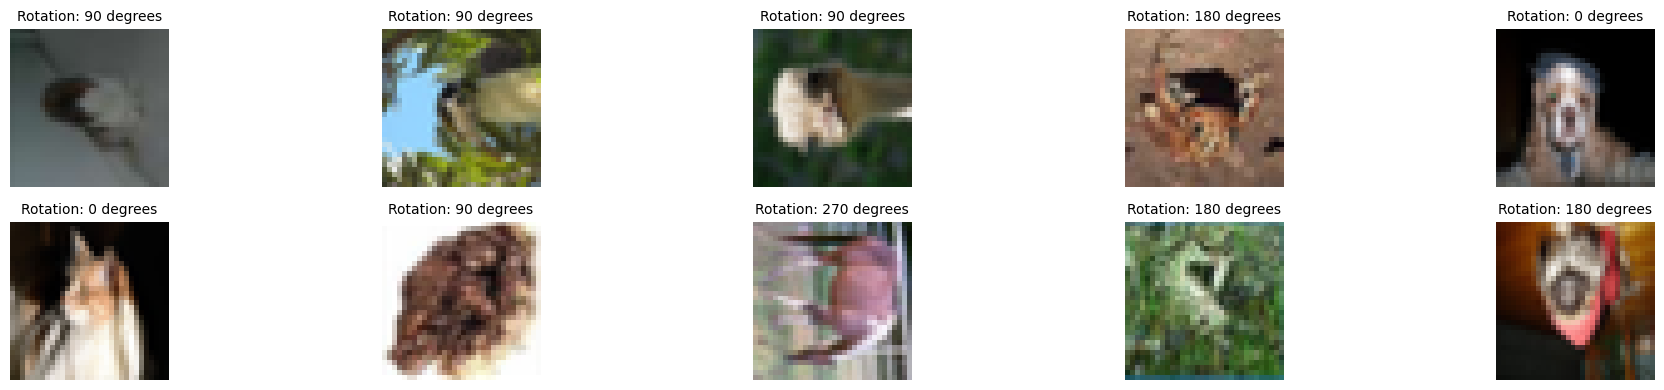

In [ ]:
 import matplotlib.pyplot as plt

# Number of images to display
n_images = 10

# Create a figure to display the images
fig, axes = plt.subplots(2, n_images//2, figsize=(20, 4))

# Define labels mapping
rotation_mapping = {0: '0 degrees', 1: '90 degrees', 2: '180 degrees', 3: '270 degrees'}

# Display the first few images from the dataset
for i, ax in enumerate(axes.flatten()):
    # Plot image on axis
    ax.imshow(X_augmented[i])
    ax.set_title(f'Rotation: {rotation_mapping[y_augmented[i][0]]}', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

